##Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.They first identify a set of employees based on recommendations/ past performance

2.Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical

3.At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('traindf.csv')

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,Analytics,7,Bachelor's,m,sourcing,2,29,3,5,0,0,85,0
1,2,Finance,2,Master's & above,f,sourcing,1,35,1,2,0,0,63,0
2,3,Sales & Marketing,2,Bachelor's,m,other,1,25,3,2,0,0,53,0
3,4,Analytics,7,Master's & above,m,other,2,46,3,7,0,0,86,0
4,5,Operations,32,Bachelor's,m,other,1,31,3,7,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,48656,Operations,2,Master's & above,m,sourcing,1,59,2,16,1,0,57,1
48656,48657,Sales & Marketing,22,Bachelor's,m,sourcing,3,35,3,3,0,0,49,0
48657,48658,Procurement,2,Bachelor's,f,sourcing,1,28,5,5,1,0,70,0
48658,48659,Operations,13,Bachelor's,f,sourcing,1,34,5,7,1,0,56,0


In [4]:
df.set_index('employee_id',inplace = True)

In [5]:
df.shape

(48660, 13)

In [6]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 1 to 48660
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            48660 non-null  object
 1   region                48660 non-null  int64 
 2   education             48660 non-null  object
 3   gender                48660 non-null  object
 4   recruitment_channel   48660 non-null  object
 5   no_of_trainings       48660 non-null  int64 
 6   age                   48660 non-null  int64 
 7   previous_year_rating  48660 non-null  int64 
 8   length_of_service     48660 non-null  int64 
 9   KPIs_met >80%         48660 non-null  int64 
 10  awards_won?           48660 non-null  int64 
 11  avg_training_score    48660 non-null  int64 
 12  is_promoted           48660 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 5.2+ MB


In [8]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
1,Analytics,7,Bachelor's,m,sourcing,2,29,3,5,0,0,85,0
2,Finance,2,Master's & above,f,sourcing,1,35,1,2,0,0,63,0
3,Sales & Marketing,2,Bachelor's,m,other,1,25,3,2,0,0,53,0
4,Analytics,7,Master's & above,m,other,2,46,3,7,0,0,86,0
5,Operations,32,Bachelor's,m,other,1,31,3,7,0,0,59,0


# Visualization and Feature Engineering

<AxesSubplot:xlabel='gender', ylabel='count'>

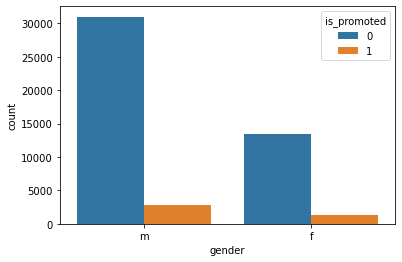

In [9]:
sns.countplot(x=df.gender,hue=df.is_promoted)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


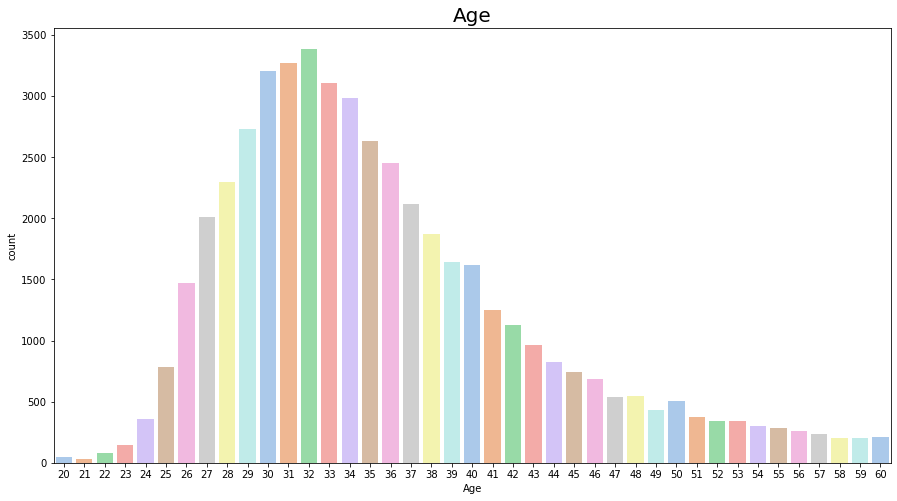

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
p = sns.countplot(df['age'], palette = 'pastel')
plt.title('Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='avg_training_score', ylabel='count'>

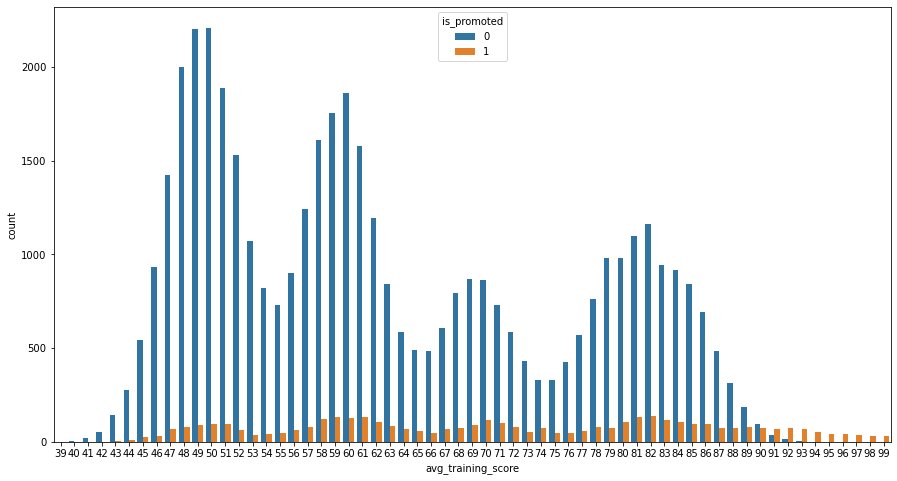

In [11]:
sns.countplot(x=df.avg_training_score,hue=df.is_promoted)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


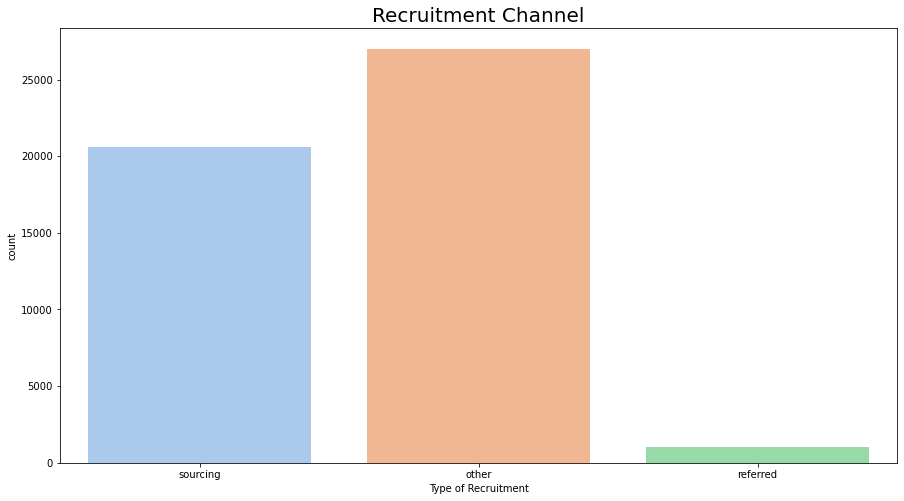

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
p = sns.countplot(df['recruitment_channel'], palette = 'pastel')
plt.title('Recruitment Channel', fontsize = 20)
plt.xlabel('Type of Recruitment')
plt.ylabel('count')
plt.show()

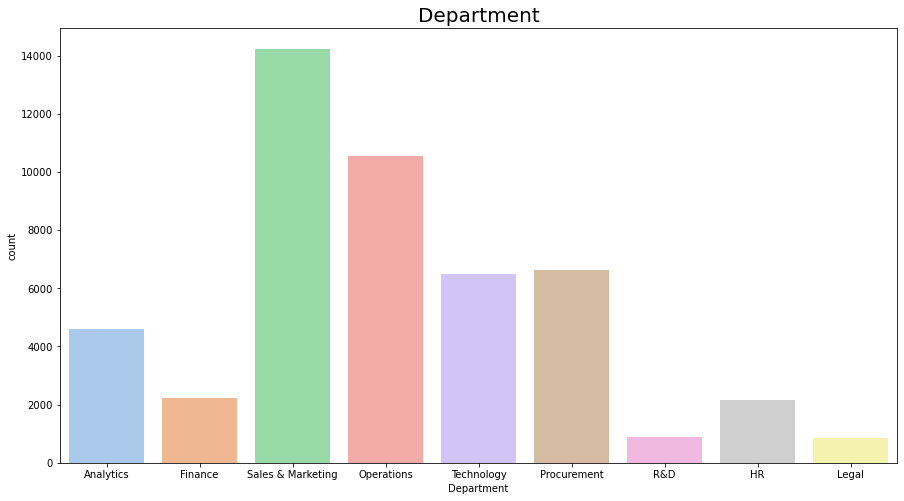

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
p = sns.countplot(x=df['department'], palette = 'pastel')
plt.title('Department', fontsize = 20)
plt.xlabel('Department')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='department', ylabel='count'>

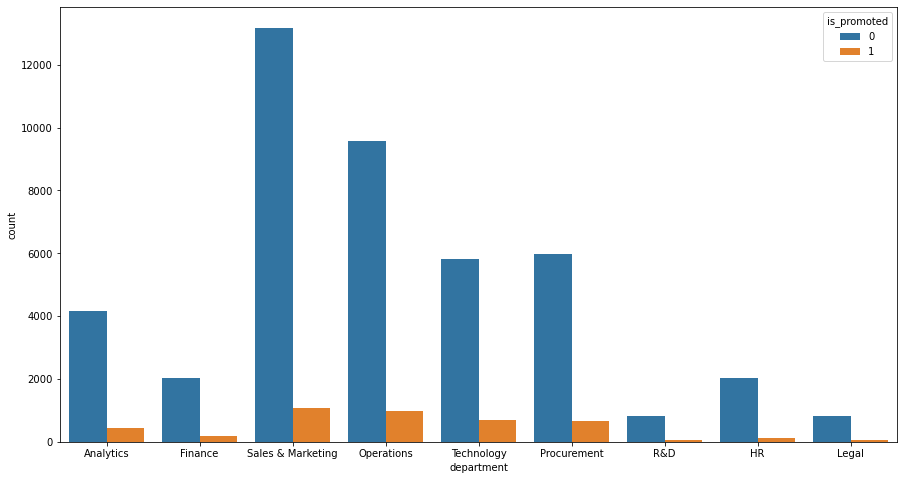

In [14]:
sns.countplot(x=df.department,hue=df.is_promoted)

<AxesSubplot:xlabel='department', ylabel='count'>

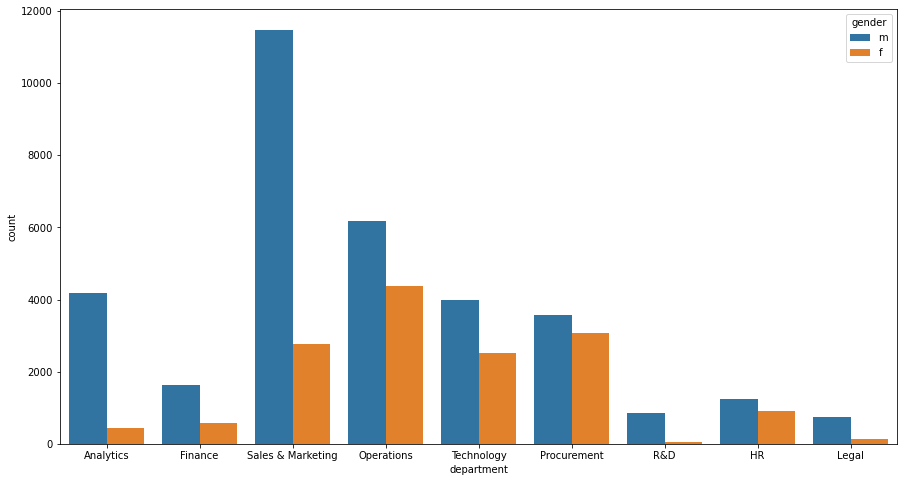

In [15]:
sns.countplot(x=df.department,hue=df.gender)

<AxesSubplot:xlabel='education', ylabel='count'>

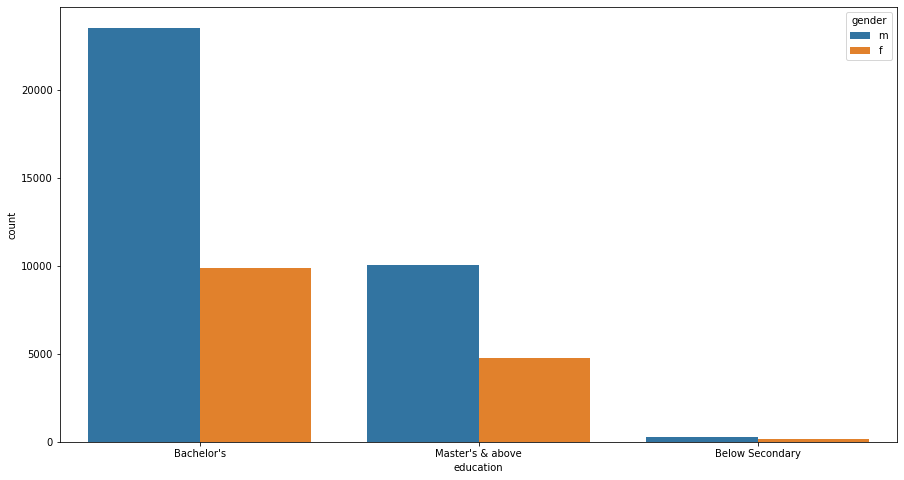

In [16]:
sns.countplot(x=df.education,hue=df.gender)

<AxesSubplot:xlabel='education', ylabel='count'>

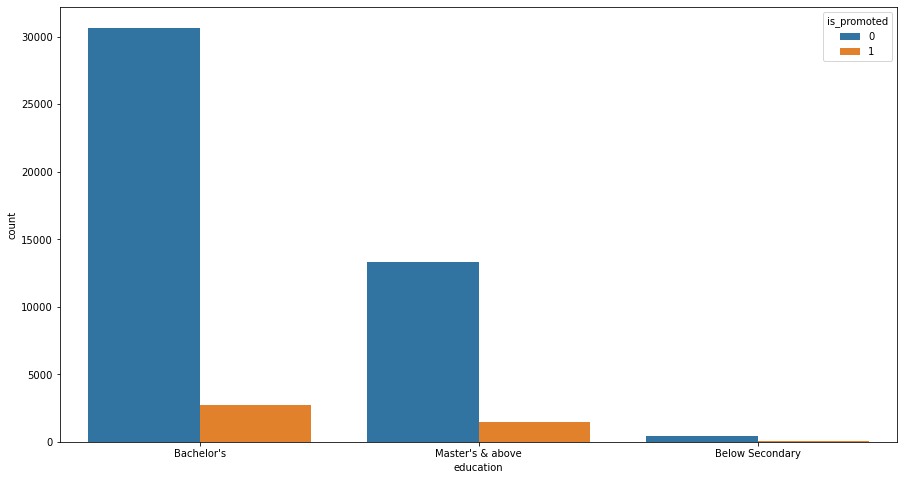

In [17]:
sns.countplot(x=df.education,hue=df.is_promoted) 

In [18]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
1,Analytics,7,Bachelor's,m,sourcing,2,29,3,5,0,0,85,0
2,Finance,2,Master's & above,f,sourcing,1,35,1,2,0,0,63,0
3,Sales & Marketing,2,Bachelor's,m,other,1,25,3,2,0,0,53,0
4,Analytics,7,Master's & above,m,other,2,46,3,7,0,0,86,0
5,Operations,32,Bachelor's,m,other,1,31,3,7,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48656,Operations,2,Master's & above,m,sourcing,1,59,2,16,1,0,57,1
48657,Sales & Marketing,22,Bachelor's,m,sourcing,3,35,3,3,0,0,49,0
48658,Procurement,2,Bachelor's,f,sourcing,1,28,5,5,1,0,70,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['department']= le.fit_transform(df['department'])

In [21]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
1,0,7,Bachelor's,m,sourcing,2,29,3,5,0,0,85,0
2,1,2,Master's & above,f,sourcing,1,35,1,2,0,0,63,0
3,7,2,Bachelor's,m,other,1,25,3,2,0,0,53,0
4,0,7,Master's & above,m,other,2,46,3,7,0,0,86,0
5,4,32,Bachelor's,m,other,1,31,3,7,0,0,59,0


In [22]:
df['education'].value_counts()


Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: education, dtype: int64

In [23]:
dict1={"Bachelor's":1,"Master's & above":2,"Below Secondary":3}
dict2={"m":1,"f":0}

In [24]:
df['education']=df['education'].replace(dict1)

In [25]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
1,0,7,1,m,sourcing,2,29,3,5,0,0,85,0
2,1,2,2,f,sourcing,1,35,1,2,0,0,63,0
3,7,2,1,m,other,1,25,3,2,0,0,53,0
4,0,7,2,m,other,2,46,3,7,0,0,86,0
5,4,32,1,m,other,1,31,3,7,0,0,59,0


In [26]:
df['gender']=df['gender'].replace(dict2)

In [27]:
df['recruitment_channel'].value_counts()

other       27017
sourcing    20623
referred     1020
Name: recruitment_channel, dtype: int64

In [28]:
dict3={"other":1,"sourcing":2,"referred":3}

In [29]:
df['recruitment_channel']=df['recruitment_channel'].replace(dict3)

In [30]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
1,0,7,1,1,2,2,29,3,5,0,0,85,0
2,1,2,2,0,2,1,35,1,2,0,0,63,0
3,7,2,1,1,1,1,25,3,2,0,0,53,0
4,0,7,2,1,1,2,46,3,7,0,0,86,0
5,4,32,1,1,1,1,31,3,7,0,0,59,0


<AxesSubplot:>

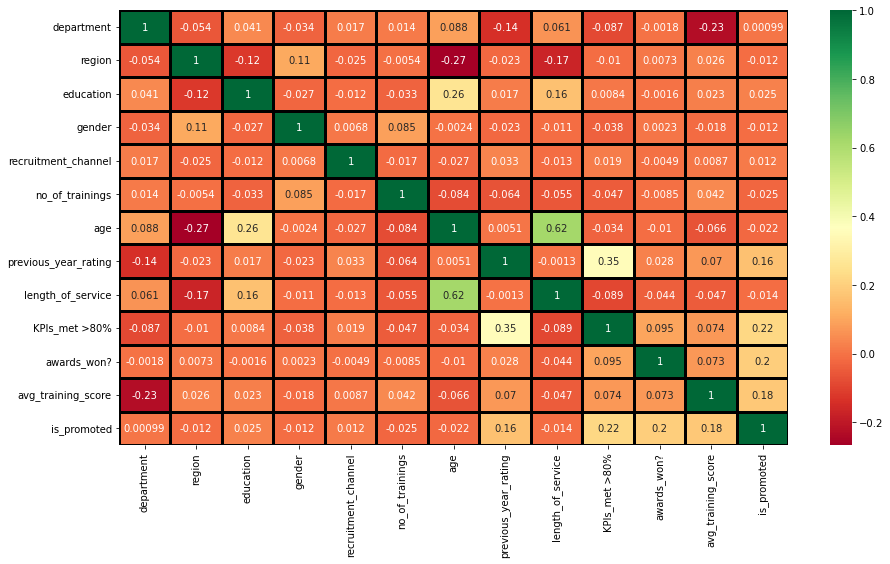

In [31]:
sns.heatmap(df.corr(),annot=True,linewidths=3,linecolor="black",cmap="RdYlGn")

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

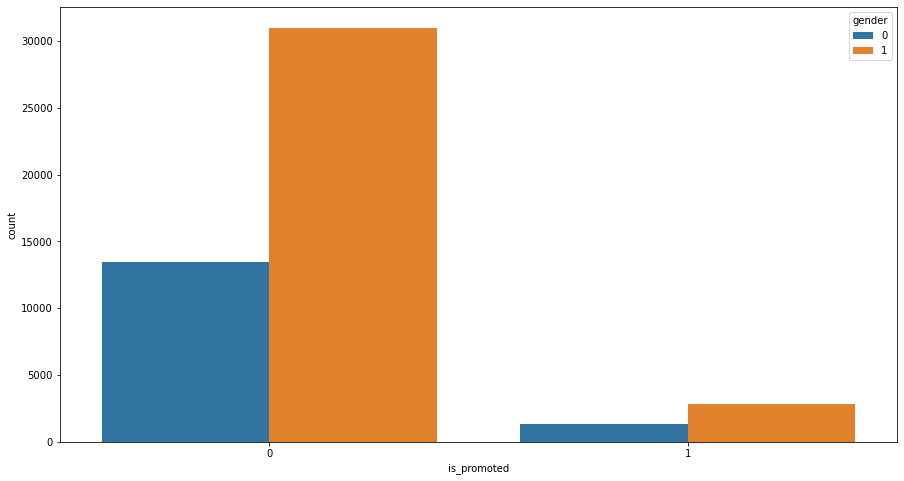

In [32]:
sns.countplot(x=df.is_promoted,hue=df.gender)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

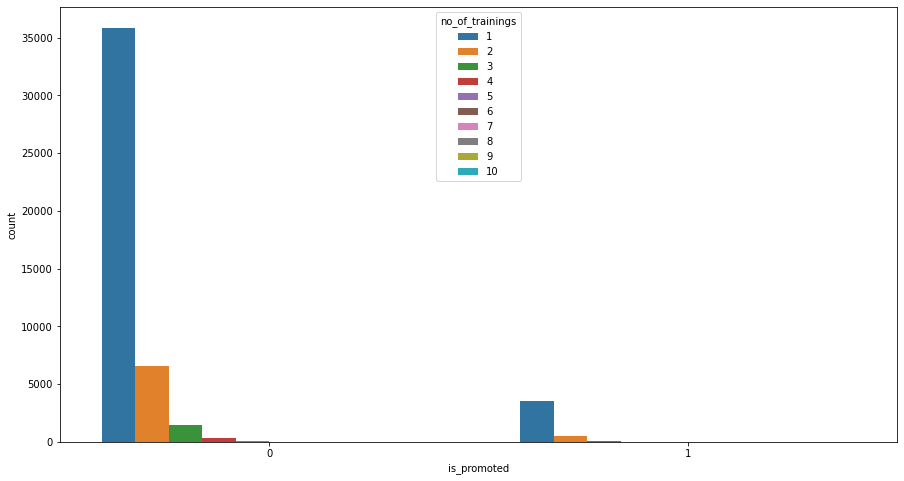

In [33]:
sns.countplot(x=df.is_promoted,hue=df.no_of_trainings)

In [34]:
df= df.drop(columns=['region'])

In [35]:
df = df.rename(columns={'awards_won?': 'Awards'})
df = df.rename(columns={'is_promoted':'Promoted'})

<AxesSubplot:xlabel='Awards', ylabel='count'>

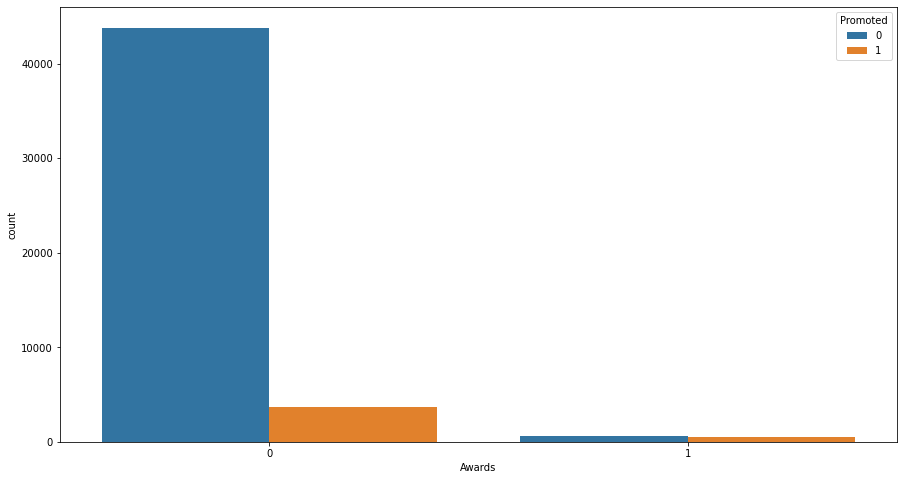

In [36]:
sns.countplot(x=df.Awards,hue=df.Promoted)

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

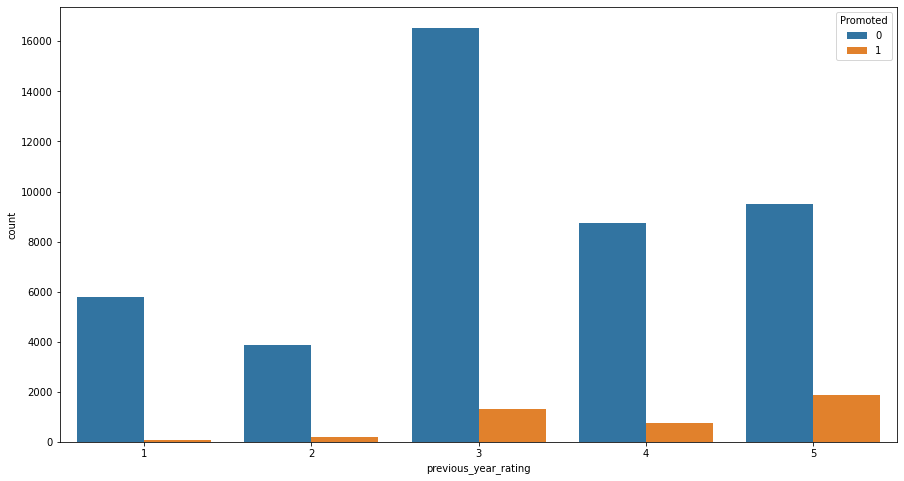

In [37]:
sns.countplot(x=df.previous_year_rating,hue=df.Promoted)

In [38]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,Awards,avg_training_score,Promoted
employee_id,,,,,,,,,,,,
1,0,1,1,2,2,29,3,5,0,0,85,0
2,1,2,0,2,1,35,1,2,0,0,63,0
3,7,1,1,1,1,25,3,2,0,0,53,0
4,0,2,1,1,2,46,3,7,0,0,86,0
5,4,1,1,1,1,31,3,7,0,0,59,0


In [39]:
df= df.rename(columns={'KPIs_met >80%':'KPIs_met'})

In [40]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,Awards,avg_training_score,Promoted
employee_id,,,,,,,,,,,,
1,0,1,1,2,2,29,3,5,0,0,85,0
2,1,2,0,2,1,35,1,2,0,0,63,0
3,7,1,1,1,1,25,3,2,0,0,53,0
4,0,2,1,1,2,46,3,7,0,0,86,0
5,4,1,1,1,1,31,3,7,0,0,59,0


In [41]:
df1 = df.to_csv("df1.csv")

In [42]:
X = df.drop(columns=['Promoted'])
Y= df['Promoted']

In [43]:
X

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,Awards,avg_training_score
employee_id,,,,,,,,,,,
1,0,1,1,2,2,29,3,5,0,0,85
2,1,2,0,2,1,35,1,2,0,0,63
3,7,1,1,1,1,25,3,2,0,0,53
4,0,2,1,1,2,46,3,7,0,0,86
5,4,1,1,1,1,31,3,7,0,0,59
...,...,...,...,...,...,...,...,...,...,...,...
48656,4,2,1,2,1,59,2,16,1,0,57
48657,7,1,1,2,3,35,3,3,0,0,49
48658,5,1,0,2,1,28,5,5,1,0,70


In [44]:
Y

employee_id
1        0
2        0
3        0
4        0
5        0
        ..
48656    1
48657    0
48658    0
48659    0
48660    0
Name: Promoted, Length: 48660, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0, test_size = 0.25)

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
Logreg = LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [48]:
Logreg.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [49]:
Y_pred = Logreg.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf = confusion_matrix(Y_test,Y_pred)
cf

array([[11084,    45],
       [  958,    78]], dtype=int64)

In [51]:
accuracy_score(Y_test,Y_pred)

0.9175503493629265

In [52]:
import pickle

In [53]:
file = open('LogReg.pkl', 'wb')

In [54]:
pickle.dump(Logreg,file)

# DecisionTree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
DTC = DecisionTreeClassifier()

In [56]:
DTC.fit(X_train,Y_train)
Y_pred= DTC.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8951911220715166

In [57]:
f1_score(Y_test,Y_pred)

0.42953020134228187

In [58]:
precision_score(Y_test,Y_pred)

0.40033361134278567

In [59]:
recall_score(Y_test,Y_pred)

0.46332046332046334

In [60]:
#hyperparameters values
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,4,5,6,7,8],
    'max_features':[4,5,6,7,8],
    'min_samples_leaf':np.arange(1,10)
}
obj = RandomizedSearchCV(DTC,param_distributions = params,cv = 10)

In [61]:
obj.fit(X, Y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': [4, 5, 6, 7, 8],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [62]:
obj.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=7, min_samples_leaf=8)

In [63]:
obj.best_params_

{'min_samples_leaf': 8, 'max_features': 7, 'max_depth': 8, 'criterion': 'gini'}

In [64]:
obj.best_score_

0.9290176736539252

In [65]:
DT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,random_state=0, splitter='best')

In [66]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=7,
                       min_samples_leaf=7, random_state=0)

In [67]:
Y_pred = DT.predict(X_test)

In [68]:
acc = accuracy_score(Y_test,Y_pred)
acc

0.9292231812577065

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf = confusion_matrix(Y_test,Y_pred)
cf

array([[11094,    35],
       [  826,   210]], dtype=int64)

In [71]:
import pickle
file = open("DT.pkl",'wb')
pickle.dump(DT,file)